<a href="https://colab.research.google.com/github/tomaszpakula/Data-Science/blob/main/Assigment_4_optional_Tomasz_Paku%C5%82a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using classification to detect spam e-mails

We want to see is an e-mail message is a spam or not. To do this we can use some classification methods, and check which one is the best for unseen data. I am going to use dataset [Spam Email Classiffication](https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset/).

####1. Loading data and preprocessing

In [ ]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import string
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

In [ ]:
df = pd.read_csv("combined_data.csv")

In [ ]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


#####Dropping duplicates and empty e-mails

In [ ]:
df = df.dropna()
df = df.drop_duplicates(subset = "text")

In [ ]:
original = df['text']

In [ ]:
df['text'] = df['text'].str.lower()

#####Removing special characters from sentences

In [ ]:
def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))
df['text'] = df['text'].apply(remove_special_characters)

#####Removing hyperlinks

In [ ]:
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

df['text'] = df['text'].apply(remove_hyperlink)

#####Tokenizing words

In [ ]:
df['text'] = df['text'].apply(word_tokenize)
df['text'] = df['text'].apply(' '.join)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#####Example message

In [ ]:
print(df['text'].iloc[1])

wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber whats worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http dmvrwm remunerativ net dfuaeirxygiq visit our website escapenumber


#####Spliting data on training and test datasets

In [ ]:
df_train, df_test = train_test_split(df, random_state = 43, test_size = 0.33)

#####Vectorizing e-mails

In [ ]:
vectorize = CountVectorizer()
vectorized_train = vectorize.fit_transform(df_train['text'])

In [ ]:
vectorize.get_feature_names_out()

array(['00', '000', '0000', ..., 'ㄢno', '写道', '小楊'], dtype=object)

In [ ]:
vectorize_test = vectorize.transform(df_test['text'])

####2. Logistic Regression Model

#####Visualizing proportions of e-mail types

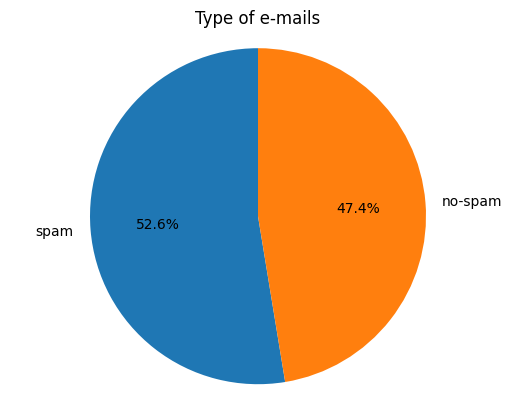

In [ ]:
sizes = [len([i for i in df_test['label'] if i]), len([i for i in df_test['label'] if not i])]
plt.pie(sizes, labels=['spam','no-spam'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Type of e-mails')
plt.show()

We see that there is almost half of one kind e-mails and and half another one, so it's good because there is lower chance we'll get a bias.

#####Training model

In [ ]:
model = LogisticRegression()
model.fit(vectorized_train, df_train['label'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.predict(vectorize_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(vectorize_test, df_test['label'])

0.9848814976210591

In [ ]:
proba = model.predict_proba(vectorize_test)[:,1]

In [ ]:
names = vectorize.get_feature_names_out()
indices = np.argsort(proba)

In [ ]:
test_message = [i for i in df_test['text']]
label = [i for i in df_test['label']]

print("example spam message:")
print(test_message[indices[-1]])
print("\nexample legit message")
print(test_message[indices[0]])

example spam message:
the best all new adult dating site on the net you have to check it out if youre single sign up today and youll enjoy a one night stand or even a threesome this weekend with the most attractive singles in your city and best of all no credit card is required to get your membership press here to join for no cost must be escapenumber and older no credit card required http concorsuper com t qboee escapenumberlp escapenumber more info if you want to have a fling this weekend with an attractive single in your city then we would like to offer you a free dating site membership just for this week only if you dont sign up for your free membership as soon as possible then youll have to pay for it in the future so come and sign up while its free we have the best looking singles around and they joined our dating network just to have fun and explore their naughtiest side with other singles press here to join for no cost must be escapenumber and older no credit card required http

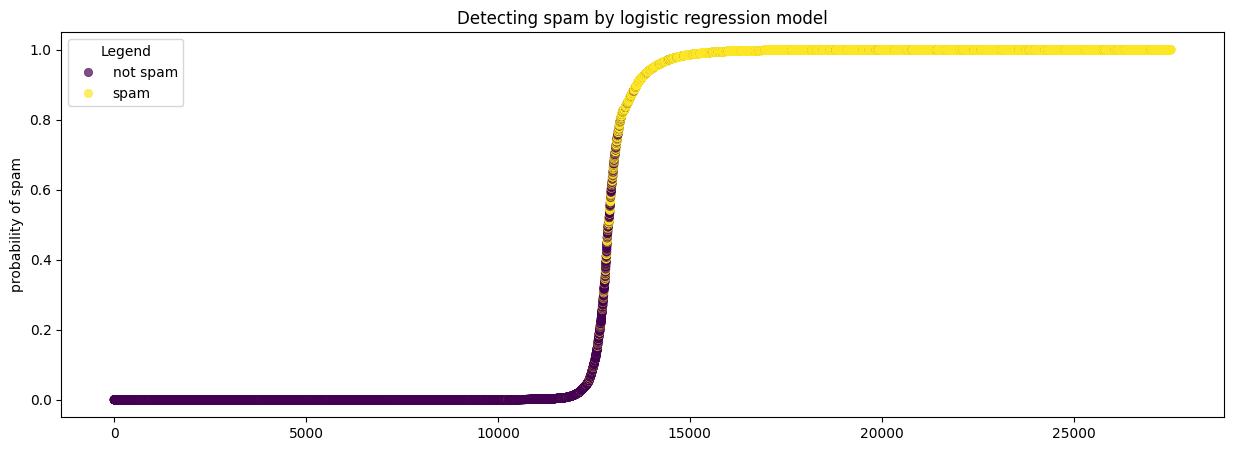

In [ ]:
plt.figure(figsize = (15,5))

colors = {0: "A", 1: "B"}

scatter=plt.scatter([i for i in range(len(indices))], [proba[i] for i in indices], c = [label[i] for i in indices], linewidths= 0.5, alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], title="Legend", labels = ["not spam","spam"])
plt.ylabel("probability of spam")
plt.title("Detecting spam by logistic regression model")
plt.show()




Now we've got a sigmoid with probability of spam.

#####Model with groups of words occuring together

In [ ]:
vectorize = CountVectorizer(ngram_range=(2,2))
vectorized_train = vectorize.fit_transform(df_train['text'])
vectorize_test = vectorize.transform(df_test['text'])
model = LogisticRegression(max_iter=1000)
model.fit(vectorized_train, df_train['label'])
model.score(vectorize_test, df_test['label'])

0.9807901808410197

We see that the probability is lower, so i'll try to add to these words also single ones.

#####Model with groups of 1 and 2 words

In [ ]:
vectorize = CountVectorizer(ngram_range=(1,2))
vectorized_train = vectorize.fit_transform(df_train['text'])
vectorize_test = vectorize.transform(df_test['text'])
model = LogisticRegression(max_iter=1000)
model.fit(vectorized_train, df_train['label'])
l_score = model.score(vectorize_test, df_test['label'])


In [ ]:
l_score

0.9876897378168349

Now the result is much better than previous one but maybe using other models will be better.

#####Confusion matrix of the logistic regression

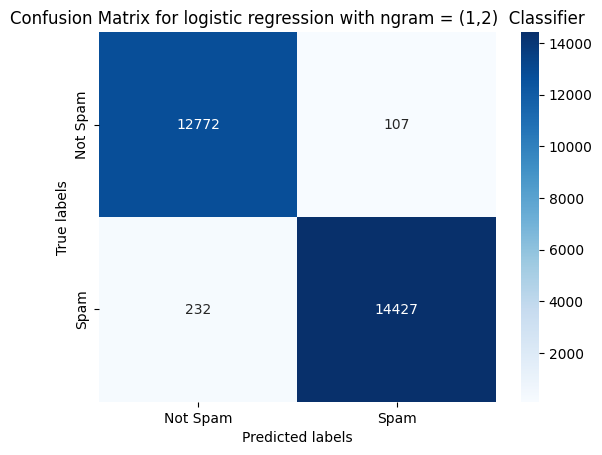

In [ ]:
cf_matrix =confusion_matrix(model.predict(vectorize_test), df_test['label'])
ax= plt.subplot()
#annot=True to annotate cells
sn.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for logistic regression with ngram = (1,2)  Classifier');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

####3. Using more models

Now i try to use another models to check will it get a better score.

#####Tree Classifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(vectorized_train, df_train['label'])
tree.score(vectorize_test, df_test['label'])

0.9617982424286441

In [ ]:
t_score = 0.9617982424286441

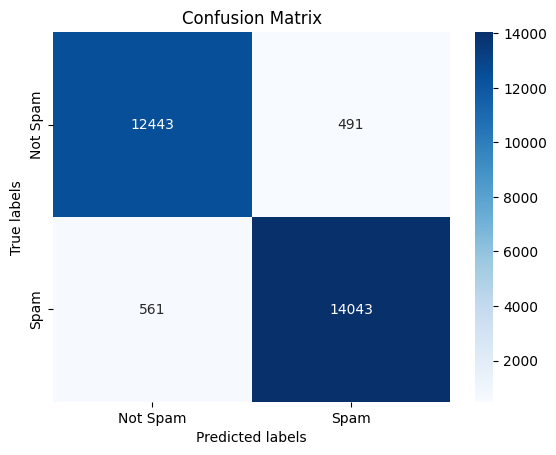

In [ ]:
cf_matrix =confusion_matrix(tree.predict(vectorize_test), df_test['label'])
ax= plt.subplot()
#annot=True to annotate cells
sn.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

#####Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(vectorized_train, df_train['label'])
rf_score = model.score(vectorize_test, df_test['label'])
rf_score

0.9795918367346939

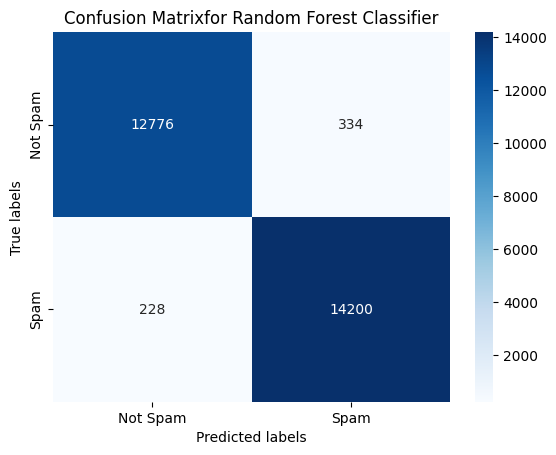

In [ ]:
cf_matrix =confusion_matrix(model.predict(vectorize_test), df_test['label'])
ax= plt.subplot()
#annot=True to annotate cells
sn.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrixfor Random Forest Classifier');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

####4. Comparision of Logistic Regression, Random Forest, and Decision Tree

[]

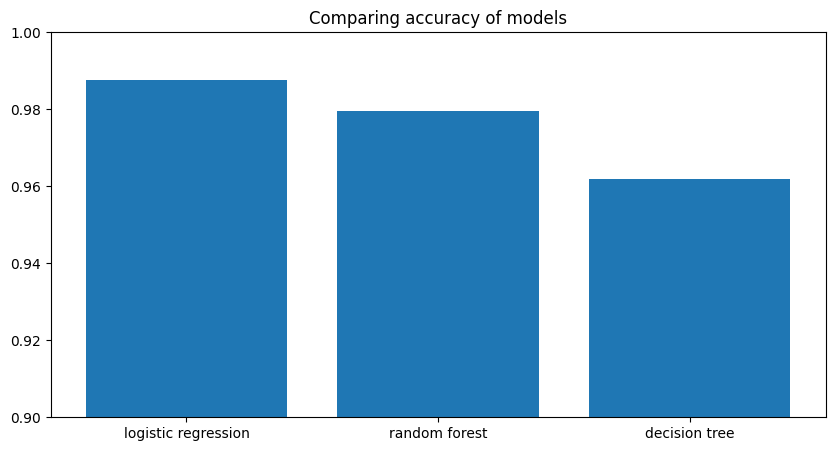

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(['logistic regression', 'random forest' , 'decision tree'],[l_score, rf_score, t_score])
plt.title("Comparing accuracy of models")
plt.ylim(top = 1, bottom=0.9)
plt.plot()

We see that the best score got logistic regression, and decision tree the worst. But it's important to check more than one model to choose the best one.